In [35]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import shutil

from hloc import (
    extract_features,
    match_features,
    match_dense,
    reconstruction,
    visualization,
    pairs_from_all,
)

ROOT = Path().absolute()
# add root to path in order to execute scripts
if str(ROOT) not in sys.path:
  sys.path.append(str(ROOT))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
images = Path("datasets/framlingham/images/")

outputs = Path("outputs/sfm/")
sfm_pairs = outputs / "pairs.txt"
sfm_dir = outputs / "framlingham_loftr"
sfm_images = sfm_dir / "images"

#retrieval_conf = extract_features.confs["netvlad"]
feature_conf = extract_features.confs["r2d2"]
matcher_conf = match_features.confs["adalam"]
#matcher_conf = match_dense.confs["loftr"]

In [3]:
pairs_from_all.main(sfm_pairs, images)

[2024/05/20 15:09:39 hloc.utils.parsers INFO] Imported 11 images from images
[2024/05/20 15:09:39 hloc INFO] Found 55 pairs.


('7Cam1.png', '7Cam10.png')


In [7]:
feature_path = extract_features.main(feature_conf, images, outputs)
match_path = match_features.main(
  conf=matcher_conf, 
  pairs=sfm_pairs, 
  features=feature_conf["output"], 
  export_dir=outputs
)

"""
feature_path, match_path = match_dense.main(
  conf=matcher_conf, 
  pairs=sfm_pairs, 
  image_dir=images, 
  export_dir=outputs,
  features_ref=feature_path
)
"""

[2024/05/20 15:16:21 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 5000, 'name': 'r2d2'},
 'output': 'feats-r2d2-n5000-r1024',
 'preprocessing': {'grayscale': False, 'resize_max': 1024}}
[2024/05/20 15:16:21 hloc INFO] Found 11 images in root datasets/framlingham/images.



>> Creating net = Quad_L2Net_ConfCFS()
 ( Model size: 486K parameters )


  0%|          | 0/11 [00:00<?, ?it/s]

dict_keys(['image'])


  9%|▉         | 1/11 [00:01<00:10,  1.09s/it]

{'keypoints': tensor([[[618.0000, 463.0000],
         [538.5511, 538.7596],
         [233.0155, 646.2366],
         ...,
         [234.3529, 449.7680],
         [320.0000, 441.2632],
         [321.8824, 444.1105]]], device='cuda:0'), 'descriptors': tensor([[[ 0.1580,  0.0368,  0.0939,  ..., -0.0262, -0.0124, -0.0167],
         [ 0.0220,  0.0088, -0.1793,  ...,  0.0290,  0.0500,  0.0375],
         [-0.1554, -0.1430, -0.0876,  ...,  0.0196, -0.0104, -0.0040],
         ...,
         [ 0.0407, -0.1335, -0.0974,  ..., -0.0075, -0.0106, -0.0065],
         [-0.0832,  0.0239,  0.0966,  ..., -0.0004, -0.0357, -0.0293],
         [ 0.0652,  0.0164,  0.0897,  ..., -0.0040, -0.0024,  0.0045]]],
       device='cuda:0'), 'scores': tensor([[0.9435, 0.9436, 0.9437,  ..., 0.9994, 0.9994, 0.9994]],
       device='cuda:0')}
dict_keys(['image'])


 18%|█▊        | 2/11 [00:01<00:08,  1.05it/s]

{'keypoints': tensor([[[106.0000, 330.0000],
         [210.4272, 230.7271],
         [265.0000, 297.0000],
         ...,
         [166.0000, 440.0000],
         [585.5470, 577.0608],
         [586.5033, 576.7357]]], device='cuda:0'), 'descriptors': tensor([[[ 0.0054,  0.0991,  0.0037,  ...,  0.0652, -0.0008, -0.0239],
         [ 0.0036,  0.0278,  0.0223,  ..., -0.0155,  0.0701,  0.0731],
         [-0.1292, -0.0767, -0.0479,  ..., -0.0364,  0.0159,  0.0260],
         ...,
         [ 0.0677, -0.0025,  0.0218,  ..., -0.0239, -0.0140, -0.0152],
         [-0.0264, -0.1053,  0.0943,  ...,  0.0162, -0.0269, -0.0406],
         [-0.0355, -0.1289,  0.0491,  ..., -0.0370, -0.0327, -0.0313]]],
       device='cuda:0'), 'scores': tensor([[0.5231, 0.5731, 0.6209,  ..., 0.9994, 0.9994, 0.9995]],
       device='cuda:0')}
dict_keys(['image'])


 27%|██▋       | 3/11 [00:02<00:07,  1.13it/s]

{'keypoints': tensor([[[388.0000, 677.0000],
         [454.1424, 420.5290],
         [292.4582, 453.7912],
         ...,
         [336.0000, 469.5691],
         [441.2632, 471.5789],
         [336.8421, 468.2105]]], device='cuda:0'), 'descriptors': tensor([[[-9.3927e-03,  7.9471e-02, -2.0937e-01,  ..., -1.4543e-02,
          -1.8948e-02, -7.2006e-03],
         [-3.4465e-03, -2.7898e-02,  1.8724e-02,  ..., -1.4775e-04,
           4.0178e-02,  3.4267e-02],
         [ 5.0319e-02, -2.1154e-01,  8.6537e-02,  ...,  3.5333e-04,
          -3.3767e-02, -3.7366e-03],
         ...,
         [-1.3307e-01, -1.3612e-02,  5.1734e-02,  ..., -8.9180e-03,
          -1.2350e-02,  2.0177e-02],
         [ 4.9378e-02, -3.9775e-02,  1.8555e-01,  ..., -3.3712e-02,
          -4.2701e-02, -2.0169e-02],
         [ 1.1521e-01, -7.0463e-02,  1.6619e-02,  ...,  9.0449e-03,
           5.3802e-03, -7.2781e-03]]], device='cuda:0'), 'scores': tensor([[0.8936, 0.8938, 0.8942,  ..., 0.9992, 0.9992, 0.9993]],
       devic

 36%|███▋      | 4/11 [00:03<00:05,  1.17it/s]

{'keypoints': tensor([[[515.0000, 425.0000],
         [756.1115, 629.6055],
         [ 12.0000,  16.0000],
         ...,
         [746.1532, 556.5583],
         [746.6006, 558.3295],
         [746.0000, 558.0000]]], device='cuda:0'), 'descriptors': tensor([[[ 0.0893,  0.1637, -0.0182,  ..., -0.0154, -0.0104, -0.0107],
         [-0.0678, -0.0703,  0.0277,  ...,  0.0354,  0.0359,  0.0440],
         [-0.0375,  0.0130,  0.0046,  ...,  0.0261,  0.0196,  0.0369],
         ...,
         [ 0.1075,  0.0093, -0.0139,  ...,  0.0077, -0.0259, -0.0098],
         [-0.0710, -0.0022, -0.0113,  ...,  0.0012, -0.0052, -0.0011],
         [ 0.1480, -0.0040,  0.0191,  ..., -0.0152, -0.0342, -0.0272]]],
       device='cuda:0'), 'scores': tensor([[0.9554, 0.9554, 0.9554,  ..., 0.9994, 0.9995, 0.9995]],
       device='cuda:0')}
dict_keys(['image'])


 45%|████▌     | 5/11 [00:04<00:05,  1.19it/s]

{'keypoints': tensor([[[226.2983, 635.0497],
         [319.6464, 388.9503],
         [137.8031, 485.9376],
         ...,
         [702.0000, 586.0000],
         [702.4595, 586.8243],
         [701.5249, 585.5470]]], device='cuda:0'), 'descriptors': tensor([[[ 0.0071, -0.0522, -0.0200,  ..., -0.0070, -0.0333, -0.0253],
         [-0.0205,  0.0476, -0.1085,  ...,  0.0277,  0.0348,  0.0310],
         [-0.1656, -0.0736,  0.0095,  ...,  0.0406,  0.0289,  0.0151],
         ...,
         [ 0.0512, -0.0279,  0.0393,  ..., -0.0087, -0.0091, -0.0095],
         [ 0.0214,  0.0006, -0.1258,  ..., -0.0334, -0.0259, -0.0017],
         [ 0.0671, -0.1355, -0.0158,  ..., -0.0282, -0.0355, -0.0145]]],
       device='cuda:0'), 'scores': tensor([[0.8913, 0.8913, 0.8915,  ..., 0.9994, 0.9995, 0.9995]],
       device='cuda:0')}
dict_keys(['image'])


 55%|█████▍    | 6/11 [00:05<00:04,  1.21it/s]

{'keypoints': tensor([[[401.0000, 356.0000],
         [ 15.0000, 268.0000],
         [ 74.1053, 666.9474],
         ...,
         [488.0000, 534.0000],
         [486.5414, 533.2155],
         [487.3523, 533.0181]]], device='cuda:0'), 'descriptors': tensor([[[ 0.0829, -0.0398, -0.0667,  ..., -0.0171, -0.0093, -0.0092],
         [ 0.0262,  0.1586, -0.1361,  ...,  0.0313,  0.0438,  0.0472],
         [-0.1358, -0.1168, -0.1147,  ...,  0.0309,  0.0249,  0.0366],
         ...,
         [ 0.0199, -0.0130,  0.0854,  ..., -0.0216, -0.0078, -0.0087],
         [ 0.1593, -0.0311,  0.0222,  ..., -0.0419, -0.0209, -0.0397],
         [ 0.1304, -0.1483,  0.0280,  ..., -0.0123, -0.0305, -0.0403]]],
       device='cuda:0'), 'scores': tensor([[0.5288, 0.5628, 0.5783,  ..., 0.9994, 0.9994, 0.9995]],
       device='cuda:0')}
dict_keys(['image'])


 64%|██████▎   | 7/11 [00:06<00:03,  1.20it/s]

{'keypoints': tensor([[[418.4768, 356.7944],
         [ 43.7895, 633.2632],
         [ 88.0000, 380.0000],
         ...,
         [491.2941, 415.8232],
         [403.7647, 424.3094],
         [596.2105, 407.5789]]], device='cuda:0'), 'descriptors': tensor([[[ 0.0945,  0.0404, -0.0806,  ..., -0.0296, -0.0100, -0.0041],
         [-0.0052,  0.1256, -0.0523,  ...,  0.0475,  0.0445,  0.0464],
         [-0.0689, -0.0957, -0.0565,  ..., -0.0080,  0.0232, -0.0371],
         ...,
         [-0.0300,  0.0850,  0.0491,  ..., -0.0054,  0.0066, -0.0130],
         [-0.1137, -0.0337,  0.0056,  ..., -0.0478, -0.0020, -0.0030],
         [ 0.0170,  0.1491,  0.0357,  ...,  0.0176, -0.0108,  0.0200]]],
       device='cuda:0'), 'scores': tensor([[0.5006, 0.5667, 0.5885,  ..., 0.9994, 0.9994, 0.9994]],
       device='cuda:0')}
dict_keys(['image'])


 73%|███████▎  | 8/11 [00:06<00:02,  1.21it/s]

{'keypoints': tensor([[[354.5908, 403.5468],
         [407.0000, 566.0000],
         [570.0000, 644.0000],
         ...,
         [732.3344, 570.8711],
         [421.0526, 427.7895],
         [724.0000, 556.0000]]], device='cuda:0'), 'descriptors': tensor([[[ 0.0271, -0.0463,  0.0442,  ..., -0.0205, -0.0140,  0.0505],
         [ 0.0601, -0.0290,  0.0791,  ...,  0.0196,  0.0414, -0.0214],
         [-0.0051, -0.0598, -0.1738,  ..., -0.0039, -0.0230,  0.0412],
         ...,
         [ 0.0530,  0.1535, -0.1103,  ...,  0.0034, -0.0125, -0.0176],
         [-0.0268,  0.1732,  0.0808,  ..., -0.0389, -0.0149, -0.0150],
         [ 0.0612,  0.0004,  0.0361,  ..., -0.0431,  0.0344, -0.0096]]],
       device='cuda:0'), 'scores': tensor([[0.9400, 0.9400, 0.9401,  ..., 0.9994, 0.9994, 0.9994]],
       device='cuda:0')}
dict_keys(['image'])


 82%|████████▏ | 9/11 [00:07<00:01,  1.22it/s]

{'keypoints': tensor([[[ 52.3096, 650.9884],
         [327.0000, 374.0000],
         [  3.3684, 269.4737],
         ...,
         [640.7072, 534.6299],
         [640.7925, 534.0023],
         [641.0000, 534.0000]]], device='cuda:0'), 'descriptors': tensor([[[-0.0708,  0.1036,  0.0036,  ..., -0.0069, -0.0199, -0.0274],
         [-0.1315,  0.0513,  0.0365,  ...,  0.0132,  0.0157,  0.0069],
         [-0.1254, -0.1337, -0.0511,  ...,  0.0430,  0.0258,  0.0117],
         ...,
         [ 0.0885, -0.0808, -0.0152,  ..., -0.0213, -0.0150,  0.0125],
         [ 0.0120, -0.0772, -0.0999,  ..., -0.0284, -0.0167, -0.0121],
         [ 0.0002, -0.1229,  0.1057,  ..., -0.0192, -0.0142, -0.0175]]],
       device='cuda:0'), 'scores': tensor([[0.5099, 0.5109, 0.6366,  ..., 0.9994, 0.9995, 0.9995]],
       device='cuda:0')}
dict_keys(['image'])


 91%|█████████ | 10/11 [00:08<00:00,  1.20it/s]

{'keypoints': tensor([[[  2.8287, 391.7790],
         [729.0000, 433.0000],
         [351.2298, 438.8571],
         ...,
         [510.5856, 391.7790],
         [266.1053, 390.7368],
         [ 24.0000, 418.0000]]], device='cuda:0'), 'descriptors': tensor([[[ 0.0392, -0.2306, -0.0085,  ..., -0.0083, -0.0072,  0.0331],
         [ 0.1325,  0.0511,  0.0257,  ...,  0.0053,  0.0070,  0.0090],
         [-0.0394, -0.0377,  0.0619,  ...,  0.0122, -0.0398, -0.0061],
         ...,
         [ 0.0122, -0.1189, -0.0715,  ..., -0.0236,  0.0041, -0.0054],
         [-0.0003,  0.0742,  0.0431,  ...,  0.0075, -0.0374,  0.0109],
         [-0.0678,  0.1549,  0.0557,  ..., -0.0035, -0.0076,  0.0445]]],
       device='cuda:0'), 'scores': tensor([[0.9495, 0.9495, 0.9496,  ..., 0.9992, 0.9992, 0.9993]],
       device='cuda:0')}
dict_keys(['image'])


100%|██████████| 11/11 [00:08<00:00,  1.26it/s]
[2024/05/20 15:16:29 hloc INFO] Finished exporting features.
[2024/05/20 15:16:29 hloc INFO] Matching local features with configuration:
{'model': {'name': 'adalam'}, 'output': 'matches-adalam'}


{'keypoints': tensor([[[241.0000,   0.0000],
         [544.5378,   0.0000],
         [198.0000,  89.0000],
         ...,
         [507.5630, 293.7224],
         [ 84.0000, 301.2094],
         [482.0000, 265.3037]]], device='cuda:0'), 'descriptors': tensor([[[ 6.8297e-02,  6.0248e-02,  3.7822e-03,  ...,  8.5468e-03,
           4.9041e-02,  1.9484e-02],
         [-8.6609e-02, -1.0593e-01, -1.6613e-01,  ...,  5.7720e-04,
          -6.0429e-05,  4.9884e-02],
         [-5.6305e-02, -9.5012e-02, -2.1612e-02,  ..., -4.1308e-02,
           1.5880e-02, -2.2217e-02],
         ...,
         [ 1.5893e-01,  1.2721e-01, -6.0168e-03,  ...,  1.6844e-02,
          -2.0606e-02, -6.9451e-03],
         [-5.5528e-02,  5.3333e-03,  8.7282e-03,  ...,  2.2501e-02,
          -3.4977e-02,  3.6542e-02],
         [-5.3651e-02, -7.2130e-02,  2.3226e-02,  ..., -2.7645e-02,
          -1.5890e-03, -8.2854e-03]]], device='cuda:0'), 'scores': tensor([[0.5350, 0.5386, 0.5517,  ..., 0.9994, 0.9994, 0.9994]],
       devic

AssertionError: outputs/sfm/pairs.txt

## 3D reconstruction
Run COLMAP on the features and matches.

In [ ]:
model = reconstruction.main(sfm_dir, sfm_images, sfm_pairs, feature_path, match_path)

[2024/05/19 18:34:03 hloc INFO] Creating an empty database...
[2024/05/19 18:34:04 hloc INFO] Importing images into the database...
[2024/05/19 18:34:06 hloc INFO] Importing features into the database...
100%|██████████| 11/11 [00:00<00:00, 170.12it/s]
[2024/05/19 18:34:06 hloc INFO] Importing matches into the database...
100%|██████████| 55/55 [00:00<00:00, 168.87it/s]
[2024/05/19 18:34:06 hloc INFO] Performing geometric verification of the matches...
I20240519 18:34:06.829007 18547 misc.cc:198] 
Custom feature matching
I20240519 18:34:06.835534 18547 feature_matching.cc:1021] Matching block [1/1]
I20240519 18:34:06.836645 18547 feature_matching.cc:46]  in 0.001s
I20240519 18:34:06.837347 18547 timer.cc:91] Elapsed time: 0.000 [minutes]
[2024/05/19 18:34:06 hloc INFO] Running 3D reconstruction...
I20240519 18:34:06.869781 18552 misc.cc:198] 
Loading database
I20240519 18:34:06.906872 18552 database_cache.cc:54] Loading cameras...
I20240519 18:34:06.908286 18552 database_cache.cc:64]  

In [44]:
from third_party.Neuralangelo.convert_data_to_json import data_to_json

args = {
  "data_dir": str(sfm_dir.absolute()),
  "scene_type": "outdoor",
  "image_dir": str(images.absolute()),
}

data_to_json(args)

if not sfm_images.exists():
  # copy files from input images to self contained project path
  # os.mkdir(new_input_path)
  print("copied input images to self contained SfM reconstruction folder")
  shutil.copytree(images, sfm_images)

Fraction of images looking at the center: 0.09.
Fraction of images positioned around the center: 0.64.
Valid fraction of concentric images: 0.00.
frame reprojection error for image ID 1: 0.539
frame reprojection error for image ID 2: 0.668
frame reprojection error for image ID 3: 0.54
frame reprojection error for image ID 4: 0.53
frame reprojection error for image ID 5: 0.549
frame reprojection error for image ID 6: 0.606
frame reprojection error for image ID 7: 0.591
frame reprojection error for image ID 8: 0.58
frame reprojection error for image ID 9: 0.678
frame reprojection error for image ID 10: 0.612
frame reprojection error for image ID 11: 1.086
Writing data to json file:  /mnt/d/dev/python/Hierarchical-Localization/outputs/sfm/framlingham_loftr/transforms.json


## Visualization
We visualize some of the registered images, and color their keypoint by visibility, track length, or triangulated depth.

In [ ]:
#visualization.visualize_sfm_2d(model, images, color_by="visibility", n=5)

NameError: name 'model' is not defined

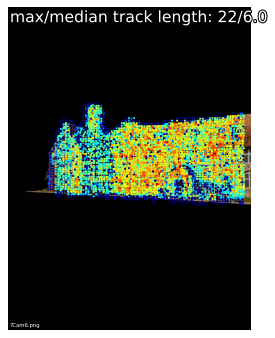

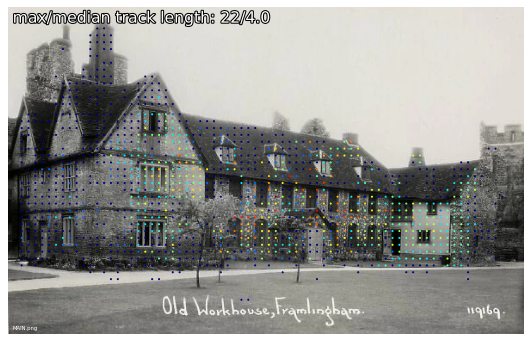

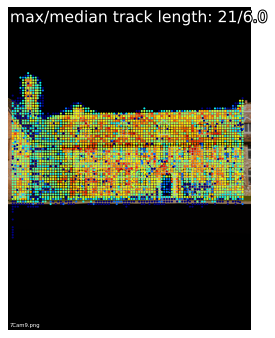

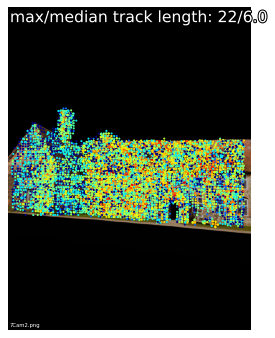

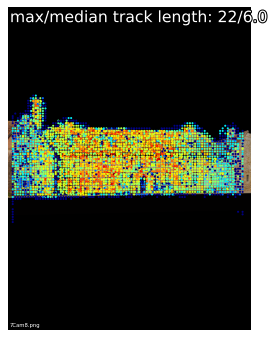

In [ ]:
#visualization.visualize_sfm_2d(model, images, color_by="track_length", n=5)

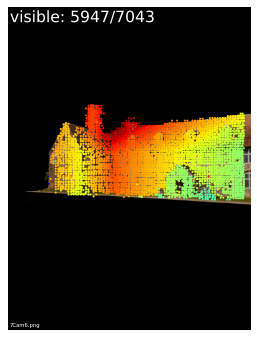

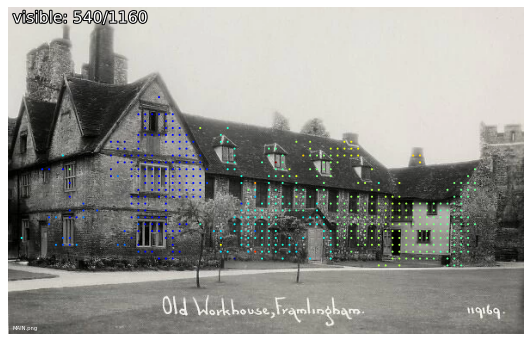

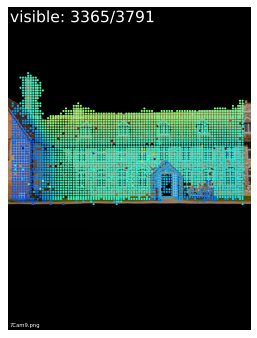

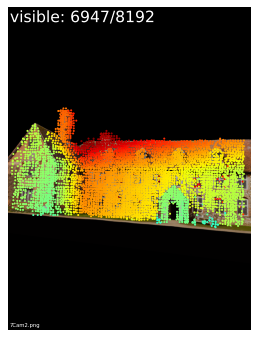

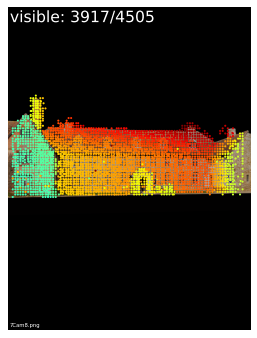

In [ ]:
#visualization.visualize_sfm_2d(model, images, color_by="depth", n=5)